In [73]:
import pandas as pd
import numpy as np

# Setting a seed ensures that the random numbers generated by numpy will be the same every time the code is run.
# This helps in reproducing the results.
np.random.seed(42)
num_rows = 1000  # Defining the number of rows (leads) that we want to generate synthetic data for.

# Generating synthetic data for Lead Source. Leads can come from various sources such as Blogs, Email Campaigns, etc.
lead_source = np.random.choice(['Blog', 'Email Campaign', 'Google Ads', 'Social Media'], size=num_rows)

# Generating synthetic data for Lead Engagement Level. It is a continuous value ranging between 1 and 5.
lead_engagement_level = np.random.uniform(1, 5, size=num_rows)

# Generating synthetic data for Market Perception. It can be Positive, Neutral, or Negative.
market_perception = np.random.choice(['Positive', 'Neutral', 'Negative'], size=num_rows)

# Generating synthetic data for Customer Feedback. It can be Positive, Neutral, or Negative.
customer_feedback = np.random.choice(['Positive', 'Neutral', 'Negative'], size=num_rows)

# Generating synthetic data for Competitor Positioning. It represents whether the competition is Above, Equal or Below.
competitor_positioning = np.random.choice(['Above', 'Equal', 'Below'], size=num_rows)

# Generating synthetic data specific to CursaLab.
# Number of participants in the demo.
demo_participants = np.random.randint(1, 6, size=num_rows)
# Boolean data indicating whether customers expect a course catalog or not.
expect_course_catalog = np.random.choice([True, False], size=num_rows)
# Boolean data indicating whether a quote was received or not.
received_quote = np.random.choice([True, False], size=num_rows)
# A continuous value indicating the percent of operational field personnel.
percent_operational = np.random.uniform(0, 1, size=num_rows)
# Boolean data indicating whether there was a previous experience or not.
previous_experience = np.random.choice([True, False], size=num_rows)
# Boolean data indicating whether there is a similar service or not.
has_similar_service = np.random.choice([True, False], size=num_rows)


## Generate Input Data

This code is responsible for simulating the conversion of leads based on various factors and creating a DataFrame containing all the synthetic data, including the decision on whether each lead was converted. The comments should help in understanding each step of the process.

In [47]:
converted = []

for i in range(num_rows):
    conversion_prob = 0.5  # Starting with a base conversion probability of 50%

    # Modifying conversion probability based on whether a quote was received.
    # If a quote was received, it increases the chances of conversion.
    if received_quote[i]:
        conversion_prob += 0.1

    # Adjusting conversion probability based on lead engagement level.
    # The engagement level is normalized by dividing by 5 as the scale is 1-5.
    conversion_prob += (lead_engagement_level[i] / 5) * 0.1

    # Market perception affects the conversion probability. Positive perception increases,
    # while negative perception decreases the probability.
    if market_perception[i] == 'Positive':
        conversion_prob += 0.1
    elif market_perception[i] == 'Negative':
        conversion_prob -= 0.1

    # Previous experience with the service increases the conversion probability.
    if previous_experience[i]:
        conversion_prob += 0.1

    # If a lead expects a course catalog and it’s not available, it might reduce the conversion probability.
    if expect_course_catalog[i]:
        conversion_prob -= 0.05

    # Ensuring that the conversion probability stays within the range [0,1].
    conversion_prob = min(max(conversion_prob, 0), 1)

    # Making a conversion decision based on the final computed probability.
    converted.append(np.random.choice([1, 0], p=[conversion_prob, 1-conversion_prob]))

# Constructing a DataFrame to hold the synthetic lead data along with the conversion outcomes.
data = {
    'Lead_Source': lead_source,
    'Lead_Engagement_Level': lead_engagement_level,
    'Market_Perception': market_perception,
    'Demo_Participants': demo_participants,
    'Expect_Course_Catalog': expect_course_catalog,
    'Received_Quote': received_quote,
    'Percent_Operational_Field_Personnel': percent_operational,
    'Previous_Experience': previous_experience,
    'Has_Similar_Service': has_similar_service,
    'Customer_Feedback': customer_feedback,
    'Competitor_Positioning': competitor_positioning,
    'Converted': converted  # Adding the conversion decision to the DataFrame
}

df = pd.DataFrame(data)  # Creating the DataFrame
df.head()  # Displaying the first few rows of the DataFrame to verify its structure and contents


,Lead_Source,Lead_Engagement_Level,Market_Perception,Demo_Participants,Expect_Course_Catalog,Received_Quote,Percent_Operational_Field_Personnel,Previous_Experience,Has_Similar_Service,Customer_Feedback,Competitor_Positioning,Converted
0,Google Ads,3.792647,Neutral,4,False,False,0.944707,True,False,Positive,Equal,1
1,Social Media,3.144385,Neutral,4,False,True,0.334878,False,True,Negative,Above,1
2,Blog,2.238110,Positive,5,True,False,0.570854,False,True,Positive,Below,1
3,Google Ads,4.255180,Positive,4,True,False,0.909595,True,False,Negative,Equal,1
4,Google Ads,3.738925,Neutral,1,True,True,0.006184,False,True,Positive,Below,1


## Handle Categoric Variables

This code snippet performs one-hot encoding on specified categorical columns of the DataFrame

In [74]:
# One-hot encoding the categorical columns
# pd.get_dummies() function is used to convert categorical variable(s) into dummy/indicator variables.
# Specified columns ('Lead_Source', 'Market_Perception', 'Competitor_Positioning', 'Customer_Feedback')
# are one-hot encoded and the resulting DataFrame is stored in df_one_hot.
df_one_hot = pd.get_dummies(df, columns=['Lead_Source', 'Market_Perception', 'Competitor_Positioning', 'Customer_Feedback'], prefix=['Lead', 'Market', 'Competitor', 'Customer'])

# Displaying the first few rows of the one-hot encoded DataFrame to verify the changes.
df_one_hot.head()

,Lead_Engagement_Level,Demo_Participants,Expect_Course_Catalog,Received_Quote,Percent_Operational_Field_Personnel,Previous_Experience,Has_Similar_Service,Converted,Lead_Blog,Lead_Email Campaign,...,Lead_Social Media,Market_Negative,Market_Neutral,Market_Positive,Competitor_Above,Competitor_Below,Competitor_Equal,Customer_Negative,Customer_Neutral,Customer_Positive
0,3.792647,4,False,False,0.944707,True,False,1,0,0,...,0,0,1,0,0,0,1,0,0,1
1,3.144385,4,False,True,0.334878,False,True,1,0,0,...,1,0,1,0,1,0,0,1,0,0
2,2.238110,5,True,False,0.570854,False,True,1,1,0,...,0,0,0,1,0,1,0,0,0,1
3,4.255180,4,True,False,0.909595,True,False,1,0,0,...,0,0,0,1,0,0,1,1,0,0
4,3.738925,1,True,True,0.006184,False,True,1,0,0,...,0,0,1,0,0,1,0,0,0,1


## Data Frame Descriptive Analysis

This code snippet does two primary tasks:

Value Counts for Boolean Columns:

For each specified boolean column ('Expect_Course_Catalog', 'Received_Quote', 'Previous_Experience'), the snippet prints the counts of unique values, essentially counting the number of True and False entries. This gives an understanding of the distribution of these boolean variables in the dataset.
Summary Statistics:

The df_one_hot.describe(include='all') line provides summary statistics for all columns in the df_one_hot DataFrame. By setting include='all', the summary is comprehensive, including both numerical and non-numerical (e.g., categorical, boolean) columns. This summary includes various statistics such as mean, standard deviation, minimum, and maximum values, giving a quick overview of the data’s general characteristics and distribution.

In [49]:
# Printing value counts for each boolean column
# The value_counts() function returns the counts of unique values in a column.
# This is particularly useful for categorical or boolean variables to understand the distribution of different categories.

# Printing the count of True and False values in the 'Expect_Course_Catalog' column
print("Expect_Course_Catalog:\n", df['Expect_Course_Catalog'].value_counts(), "\n")

# Printing the count of True and False values in the 'Received_Quote' column
print("Received_Quote:\n", df['Received_Quote'].value_counts(), "\n")

# Printing the count of True and False values in the 'Previous_Experience' column
print("Previous_Experience:\n", df['Previous_Experience'].value_counts(), "\n")

# Summary statistics
# The describe() function provides a summary of statistics pertaining to the DataFrame columns.
# include='all' ensures that the summary includes all columns, not just the numerical ones.
df_one_hot.describe(include='all')


Expect_Course_Catalog:
 True     518
False    482
Name: Expect_Course_Catalog, dtype: int64 

Received_Quote:
 False    523
True     477
Name: Received_Quote, dtype: int64 

Previous_Experience:
 False    505
True     495
Name: Previous_Experience, dtype: int64 



,Lead_Engagement_Level,Demo_Participants,Expect_Course_Catalog,Received_Quote,Percent_Operational_Field_Personnel,Previous_Experience,Has_Similar_Service,Converted,Lead_Blog,Lead_Email Campaign,...,Lead_Social Media,Market_Negative,Market_Neutral,Market_Positive,Competitor_Above,Competitor_Below,Competitor_Equal,Customer_Negative,Customer_Neutral,Customer_Positive
count,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,2,2,NaN,2,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,True,False,NaN,False,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,518,523,NaN,505,508,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.999019,3.057000,NaN,NaN,0.496732,NaN,NaN,0.669000,0.258000,0.230000,...,0.280000,0.315000,0.349000,0.336000,0.338000,0.346000,0.316000,0.331000,0.312000,0.357000
std,1.167201,1.400612,NaN,NaN,0.288735,NaN,NaN,0.470809,0.437753,0.421043,...,0.449224,0.464748,0.476892,0.472575,0.473265,0.475931,0.465146,0.470809,0.463542,0.479355
min,1.018528,1.000000,NaN,NaN,0.003918,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.947731,2.000000,NaN,NaN,0.243461,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.002166,3.000000,NaN,NaN,0.495443,NaN,NaN,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.998916,4.000000,NaN,NaN,0.741762,NaN,NaN,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Input Data Cleaning

This code snippet is used for basic data validation and preprocessing checks:

Checking for Missing Values:

df_one_hot.isnull().sum() checks for missing (NaN) values in each column of the DataFrame df_one_hot. It provides a summary showing the number of missing values in each column, allowing for the identification of columns with missing data that may need further handling or cleaning.
Checking Data Types:

df_one_hot.dtypes gives an overview of the data types present in each column of the DataFrame df_one_hot. This is essential for identifying the kind of data present in each column and ensuring it aligns with expectations, thus helping to identify any inconsistencies or errors in the data types that may need correction before further data processing or analysis.

In [75]:
# Checking for any missing values in the DataFrame
# The isnull() function is used to detect missing values. It returns a DataFrame where each cell is a boolean value that
# indicates whether the cell in the original DataFrame is a missing value (NaN).
# The sum() function then adds up these boolean values (True=1, False=0), resulting in a count of missing values for each column.
print(df_one_hot.isnull().sum())

# Checking the data types of each column in the DataFrame
# The dtypes attribute returns a Series with the data type of each column. This is useful to ensure that each column has the
# expected data type, and to identify if any columns have a mixed or unexpected data type.
print(df_one_hot.dtypes)


Lead_Engagement_Level                  0
Demo_Participants                      0
Expect_Course_Catalog                  0
Received_Quote                         0
Percent_Operational_Field_Personnel    0
Previous_Experience                    0
Has_Similar_Service                    0
Converted                              0
Lead_Blog                              0
Lead_Email Campaign                    0
Lead_Google Ads                        0
Lead_Social Media                      0
Market_Negative                        0
Market_Neutral                         0
Market_Positive                        0
Competitor_Above                       0
Competitor_Below                       0
Competitor_Equal                       0
Customer_Negative                      0
Customer_Neutral                       0
Customer_Positive                      0
dtype: int64
Lead_Engagement_Level                  float64
Demo_Participants                        int64
Expect_Course_Catalog           

## Visualizations

This code snippet creates stacked bar charts to visualize the conversion rate against each categorical variable.
The function plot_stacked_bar is defined to handle the plotting for each individual column:
It takes in a column name and an axis (subplot) as input.
It groups the data by the specified column and 'Converted' status, calculates the proportions, and then creates a stacked bar chart.
Titles and labels are added to make the charts self-explanatory.
Four subplots are created in a 2x2 grid where each subplot is a stacked bar chart for a different categorical variable.
A common legend is displayed at the top of the figure, enhancing the readability of the plots.

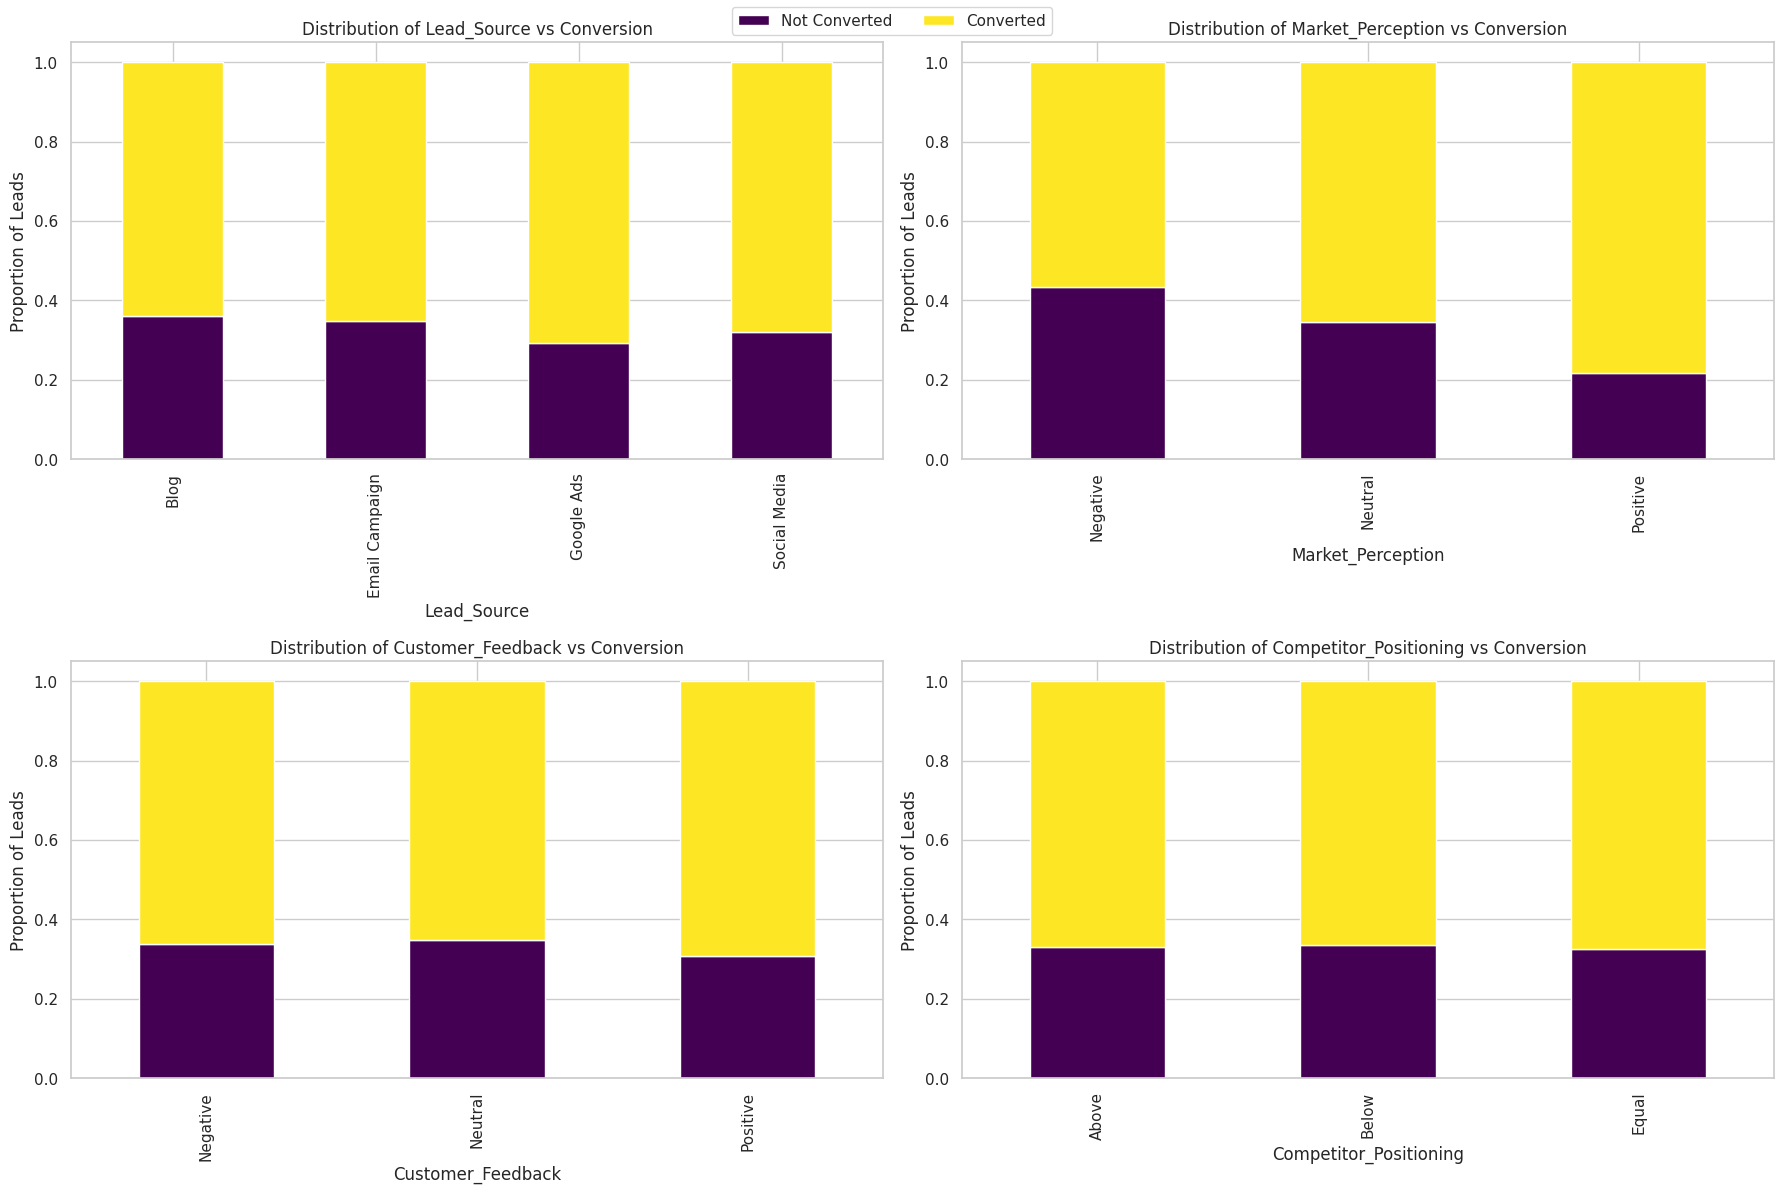

In [76]:
import matplotlib.pyplot as plt

# Function to plot a stacked bar chart for the given column against conversion rate.
def plot_stacked_bar(column, ax):
    # Grouping the DataFrame by the specified column and 'Converted' status,
    # then counting the size of each group and unstacking the resulting DataFrame.
    df_grouped = df.groupby([column, 'Converted']).size().unstack().fillna(0)

    # Normalizing the grouped DataFrame, so the values represent proportions instead of counts.
    df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0)

    # Plotting the normalized grouped data as a stacked bar chart.
    df_grouped.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

    # Setting titles and labels for clarity.
    ax.set_title(f'Distribution of {column} vs Conversion')
    ax.set_ylabel("Proportion of Leads")
    ax.set_xlabel(column)

    # Hiding the legend temporarily, as it will be displayed later for the whole figure.
    ax.legend().set_visible(False)

# Setting up the figure with 2x2 subplots, which means there will be 4 subplots.
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Applying the plot_stacked_bar function to each categorical variable.
plot_stacked_bar('Lead_Source', axs[0, 0])
plot_stacked_bar('Market_Perception', axs[0, 1])
plot_stacked_bar('Customer_Feedback', axs[1, 0])
plot_stacked_bar('Competitor_Positioning', axs[1, 1])

# Adjusting the layout so that plots do not overlap.
plt.tight_layout()

# Displaying the legend for the entire figure at an upper central position.
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, ["Not Converted", "Converted"], loc='upper center', ncol=2)

# Displaying all the plots.
plt.show()


This code is designed to visualize the distribution of some key variables within the dataset.
It creates a figure composed of three separate subplots.
The first subplot is a histogram that displays the distribution of the Lead_Engagement_Level variable, complemented by a Kernel Density Estimate (KDE).
The second subplot is a boxplot visualizing the spread of Lead_Engagement_Level values, differentiated by whether a lead was converted or not.
The third subplot is a count plot that shows the distribution of different Lead_Source categories, broken down by conversion status.
Styling elements like titles and labels are added to make the visualizations more informative and reader-friendly.

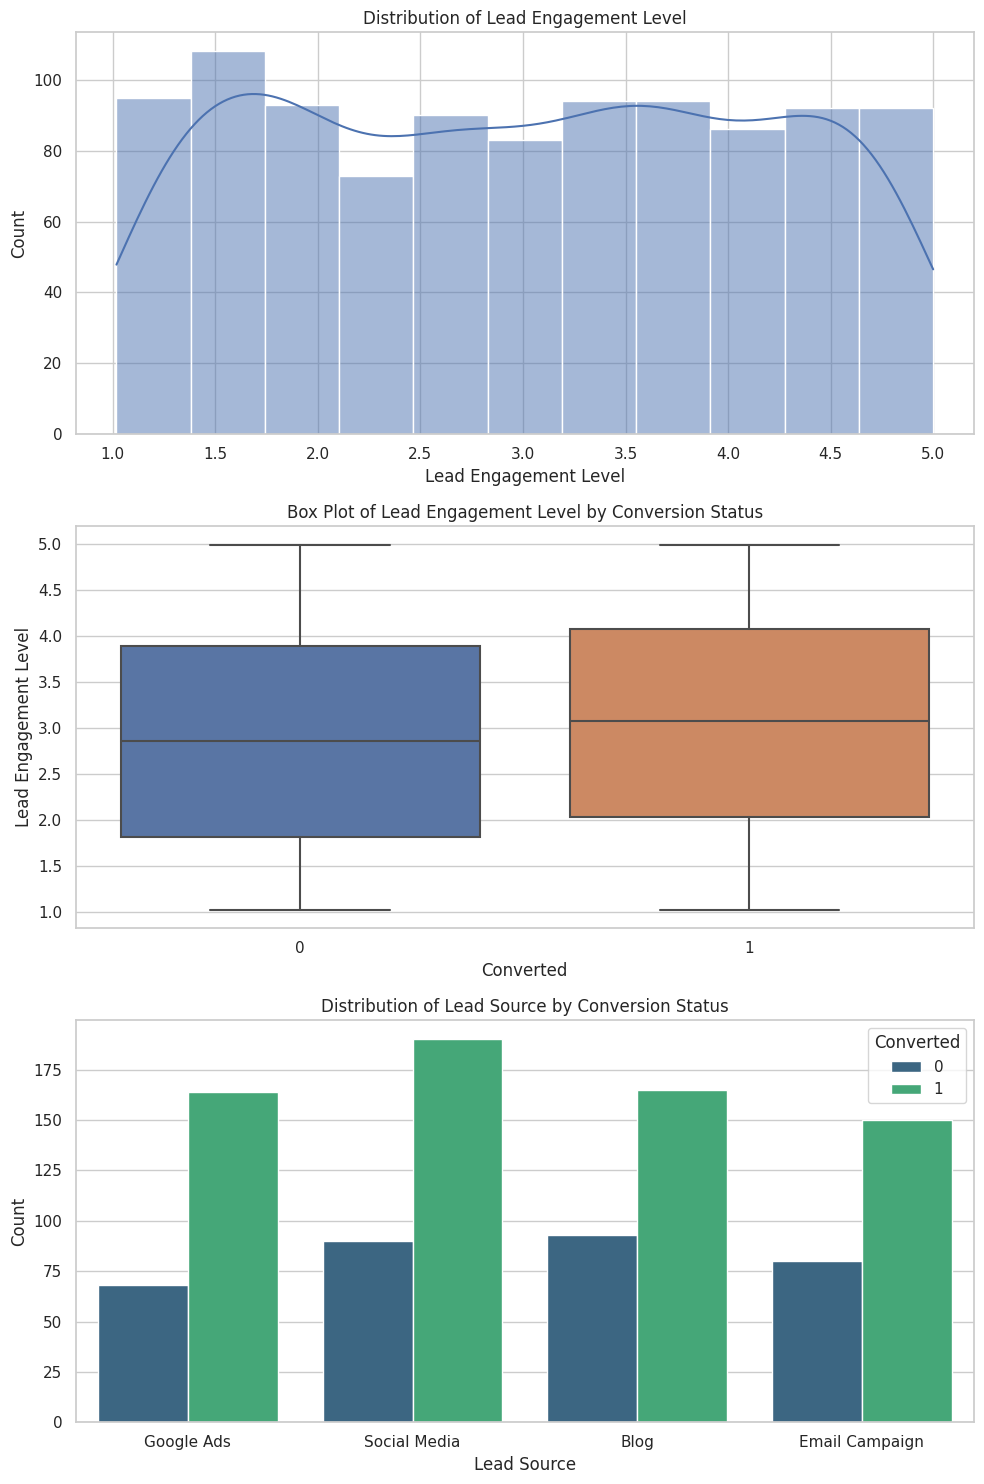

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization to have a clean white background with grid lines.
sns.set(style="whitegrid")

# Create a figure with multiple subplots, organized in a 3x1 grid (3 rows and 1 column),
# and setting the figure size to be 10 by 15 inches.
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# 1. Plotting a Histogram for Lead_Engagement_Level
# Using seaborn's histplot to visualize the distribution of 'Lead_Engagement_Level'.
# KDE (Kernel Density Estimate) is also plotted to estimate the probability density function of the variable.
sns.histplot(df['Lead_Engagement_Level'], kde=True, ax=axes[0])
# Setting the title and labels for the first subplot.
axes[0].set_title('Distribution of Lead Engagement Level')
axes[0].set_xlabel('Lead Engagement Level')
axes[0].set_ylabel('Count')

# 2. Creating a Box Plot for Lead_Engagement_Level versus Conversion status (Converted)
# This boxplot helps in understanding the distribution of 'Lead_Engagement_Level' across different conversion statuses.
sns.boxplot(x='Converted', y='Lead_Engagement_Level', data=df, ax=axes[1])
# Setting the title and labels for the second subplot.
axes[1].set_title('Box Plot of Lead Engagement Level by Conversion Status')
axes[1].set_xlabel('Converted')
axes[1].set_ylabel('Lead Engagement Level')

# 3. Creating a Count Plot for Lead_Source
# This count plot will show the number of occurrences of each 'Lead_Source' category,
# differentiated by the conversion status through color-coding.
sns.countplot(x='Lead_Source', hue='Converted', data=df, ax=axes[2], palette='viridis')
# Setting the title and labels for the third subplot.
axes[2].set_title('Distribution of Lead Source by Conversion Status')
axes[2].set_xlabel('Lead Source')
axes[2].set_ylabel('Count')

# Adjusting the spacing between the subplots for better readability and aesthetics.
plt.tight_layout()

# Displaying all the subplots.
plt.show()



This code creates visualizations for different variables in the dataset, generating four separate subplots in a single figure.
The variables visualized include Demo_Participants, Percent_Operational_Field_Personnel, Expect_Course_Catalog, and Received_Quote.
Different types of plots such as histograms, box plots, and count plots are used based on the nature of the data to be visualized, making the visual representation comprehensive and insightful.
Specific stylistic attributes such as color and palette have been assigned to individual plots to enhance visual differentiation and overall aesthetics.

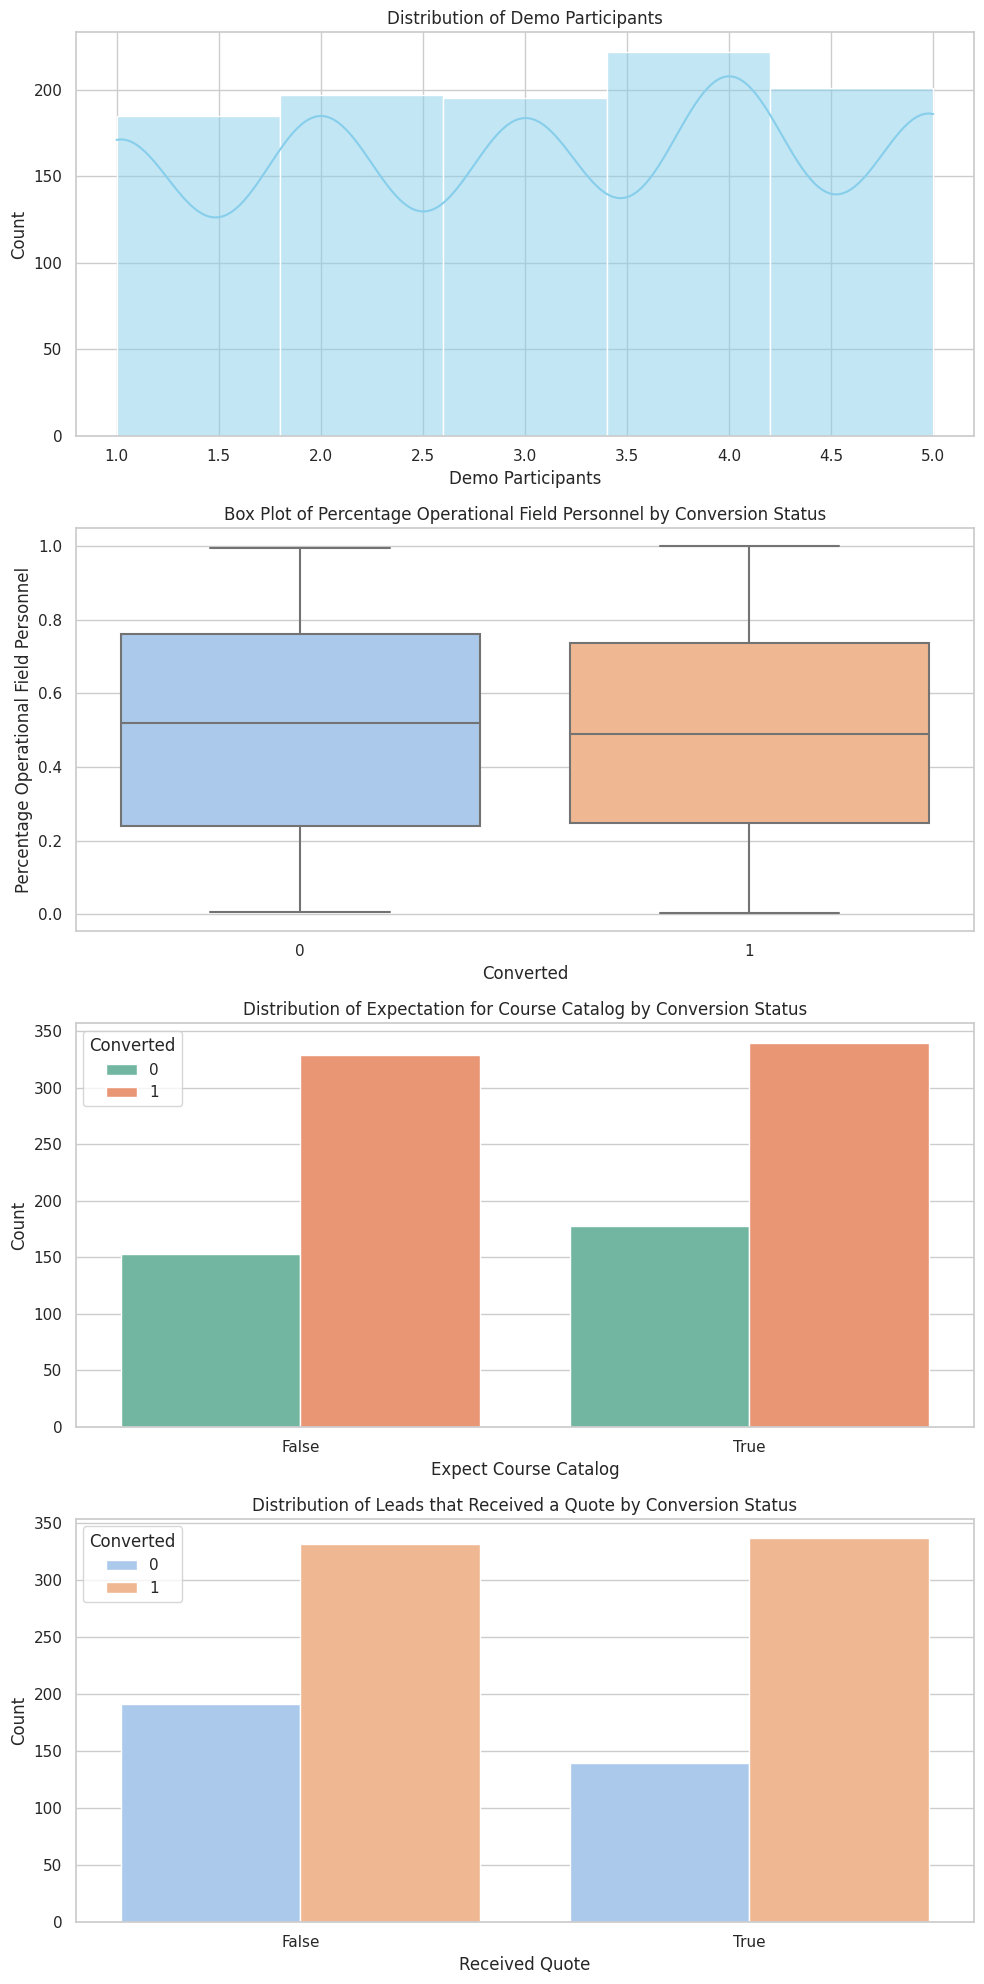

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with multiple subplots organized in a 4x1 grid (4 rows and 1 column)
# Setting the figure size to be 10 by 20 inches for better visibility.
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20))

# 1. Plotting a Histogram for Demo_Participants
# Using seaborn’s histplot function, the distribution of 'Demo_Participants' is visualized.
# KDE (Kernel Density Estimate) is included, and the color is set to skyblue with 5 bins.
sns.histplot(df['Demo_Participants'], kde=True, ax=axes[0], color='skyblue', bins=5)
# Setting titles and labels to enhance the readability of the first plot.
axes[0].set_title('Distribution of Demo Participants')
axes[0].set_xlabel('Demo Participants')
axes[0].set_ylabel('Count')

# 2. Creating a Box Plot for Percent_Operational_Field_Personnel vs. Converted
# This boxplot shows the distribution of 'Percent_Operational_Field_Personnel' against the conversion status.
sns.boxplot(x='Converted', y='Percent_Operational_Field_Personnel', data=df, ax=axes[1], palette='pastel')
# Setting titles and labels for the second plot.
axes[1].set_title('Box Plot of Percentage Operational Field Personnel by Conversion Status')
axes[1].set_xlabel('Converted')
axes[1].set_ylabel('Percentage Operational Field Personnel')

# 3. Creating a Count Plot for Expect_Course_Catalog
# This plot visualizes the count of leads that expect a course catalog, categorized by conversion status.
sns.countplot(x='Expect_Course_Catalog', hue='Converted', data=df, ax=axes[2], palette='Set2')
# Setting titles and labels for the third plot.
axes[2].set_title('Distribution of Expectation for Course Catalog by Conversion Status')
axes[2].set_xlabel('Expect Course Catalog')
axes[2].set_ylabel('Count')

# 4. Creating a Count Plot for Received_Quote
# This plot illustrates the count of leads that received a quote, categorized by conversion status.
sns.countplot(x='Received_Quote', hue='Converted', data=df, ax=axes[3], palette='pastel')
# Setting titles and labels for the fourth plot.
axes[3].set_title('Distribution of Leads that Received a Quote by Conversion Status')
axes[3].set_xlabel('Received Quote')
axes[3].set_ylabel('Count')

# Adjust the layout to ensure that plots don’t overlap, making them more visually appealing.
plt.tight_layout()

# Display all the created subplots.
plt.show()


## Hypothesis Testing

This code performs hypothesis testing on the columns of the dataset against the Converted target variable.
For categorical and boolean variables, a Chi-Square Test is applied to determine if there's a significant association between the variable and the conversion status.
For continuous variables, a T-Test is conducted to compare the means of the two groups (converted and not converted) and ascertain if there are significant differences.
The results of the tests, including the test statistic and p-values, are compiled in a DataFrame for easy interpretation and analysis. Each test's significance is determined based on a p-value threshold of 0.05.
Finally, the first 20 results of the hypothesis tests are displayed, providing a snapshot of the relationships between various variables and the conversion status.

In [79]:
import warnings
import scipy.stats as stats
import pandas as pd
import numpy as np

# Suppressing the warnings that might pop up during the execution of hypothesis tests.
warnings.filterwarnings('ignore')

# Initializing an empty DataFrame to store the results of hypothesis testing.
# The DataFrame will have columns such as Variable, Test, Statistic, p-value, and Result.
hypothesis_results = pd.DataFrame(columns=['Variable', 'Test', 'Statistic', 'p-value', 'Result'])

# Iterating over each column in the dataframe 'df'.
for column in df.columns:
    if column != 'Converted':  # Exclude the target variable 'Converted'.
        # For boolean and categorical variables (object type), a Chi-Square Test will be performed.
        if df[column].dtype == bool or df[column].dtype == np.object:

            # Creating a contingency table for the Chi-Square Test.
            contingency_table = pd.crosstab(df[column], df['Converted'])

            # Performing the Chi-Square Test.
            chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

            # Storing the type of test and the statistic value.
            test = 'Chi-Square'
            statistic = chi2

        # For continuous variables, a T-Test will be performed.
        else:
            # Separating the data into two groups based on the 'Converted' status.
            group1 = df[df['Converted'] == 1][column]
            group2 = df[df['Converted'] == 0][column]

            # Performing the T-Test.
            statistic, p = stats.ttest_ind(group1, group2)

            # Storing the type of test.
            test = 'T-Test'

        # Determining the significance of the result based on a p-value threshold of 0.05.
        result = 'Significant' if p < 0.05 else 'Not Significant'

        # Compiling the results and appending them to the 'hypothesis_results' DataFrame.
        new_row = pd.DataFrame({'Variable': [column], 'Test': [test],
                                'Statistic': [statistic], 'p-value': [p],
                                'Result': [result]})
        hypothesis_results = pd.concat([hypothesis_results, new_row], ignore_index=True)

# Displaying the first 20 results of the hypothesis testing.
hypothesis_results.head(20)


,Variable,Test,Statistic,p-value,Result
0,Lead_Source,Chi-Square,2.926082,4.031628e-01,Not Significant
1,Lead_Engagement_Level,T-Test,2.451527,1.439566e-02,Significant
2,Market_Perception,Chi-Square,35.380107,2.076383e-08,Significant
3,Demo_Participants,T-Test,0.761130,4.467595e-01,Not Significant
4,Expect_Course_Catalog,Chi-Square,0.660284,4.164598e-01,Not Significant
5,Received_Quote,Chi-Square,5.472366,1.931945e-02,Significant
6,Percent_Operational_Field_Personnel,T-Test,-0.481775,6.300717e-01,Not Significant
7,Previous_Experience,Chi-Square,16.635030,4.530646e-05,Significant
8,Has_Similar_Service,Chi-Square,1.580251,2.087245e-01,Not Significant
9,Customer_Feedback,Chi-Square,1.399783,4.966391e-01,Not Significant


## Correlation Analysis

This code snippet is dedicated to visualizing the correlation matrix of your dataframe df_one_hot.
Initially, it calculates the correlation between every pair of columns in your dataframe. The result is a correlation matrix.
A mask for the upper triangle of the correlation matrix is created to avoid displaying redundant, symmetrical information.
It then sets up a figure for plotting and customizes the appearance, including the color mapping of the heatmap.
Finally, the heatmap is displayed. In the heatmap:
A darker color represents a stronger correlation.
The color’s hue indicates the nature of the correlation—whether it's positive (correlated) or negative (inversely correlated).

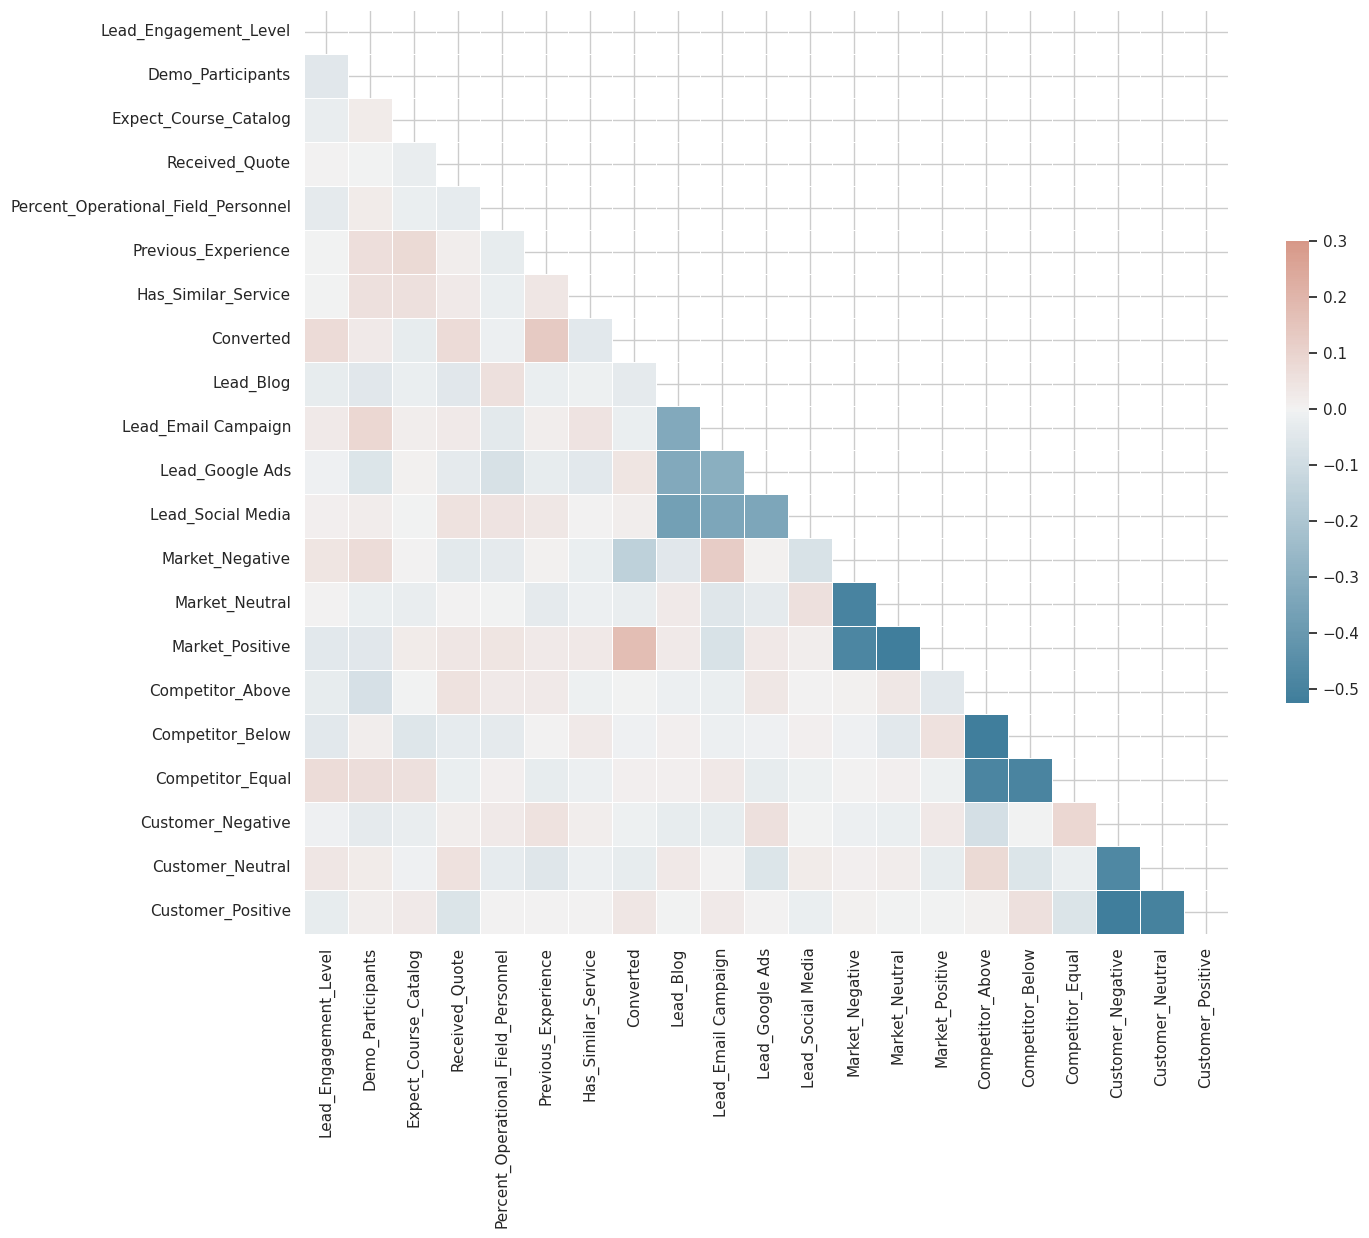

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix of the dataframe 'df_one_hot'.
# This will compute how each pair of columns (variables) in the dataframe is linearly related.
corr = df_one_hot.corr()

# Create a boolean mask for the upper triangle of the correlation matrix.
# Since the correlation matrix is symmetrical, this step helps in ignoring one half of the values to avoid redundancy.
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up a matplotlib figure with a specific size to make sure the plot is clearly visible and not cramped.
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap for the heatmap.
# This helps in differentiating between positive, negative, and no correlations with varying colors.
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap using seaborn’s heatmap function.
# It includes various customizations such as masking the upper triangle, defining the color map, setting max values,
# centering, square-shaped cells, line widths between cells, and the size of the color bar.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Display the heatmap plot which visualizes the correlation between different columns in the dataframe 'df_one_hot'.
plt.show()



This code snippet visualizes how each variable in the df_one_hot dataframe correlates with the 'Converted' column.
Initially, the correlation of all columns with 'Converted' is calculated, and the self-correlation of 'Converted' is removed as it’s always 1.
A heatmap is then generated to visualize these correlations:
Variables are sorted based on their absolute correlation values in descending order, ensuring that stronger correlations appear at the top of the heatmap.
The heatmap uses color variations to depict the strength and direction of the correlations, with annotations to display exact correlation values.
The colormap ranges from -1 to 1, representing the full spectrum of possible correlation values.
Finally, the heatmap, titled 'Correlation of Variables with Conversion', is displayed, providing a clear visualization of how each variable relates to conversion.

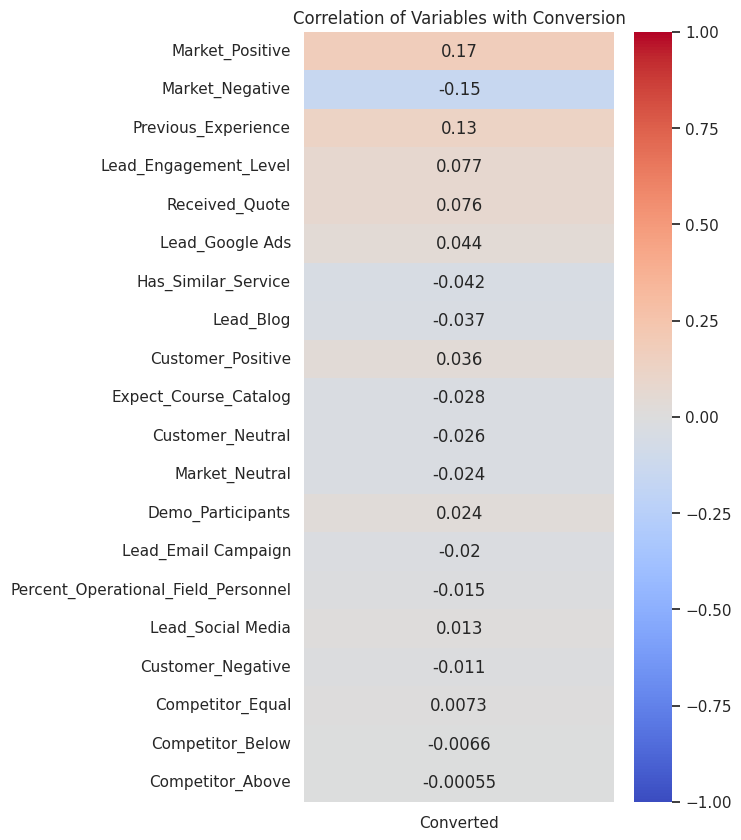

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the correlation of all variables with 'Converted' from the dataframe 'df_one_hot'.
# The resulting object 'corr_with_converted' will hold the correlation coefficients
# between 'Converted' and every other column in the dataframe.
corr_with_converted = df_one_hot.corr().loc[:, ['Converted']]

# Remove the 'Converted-Converted' correlation from the results because it’s always 1.
# It's the correlation of the 'Converted' column with itself, and it doesn't provide useful information.
corr_with_converted = corr_with_converted.drop(index='Converted')

# Set up the plot with a specific size to make it clearly visible.
plt.figure(figsize=(5, 10))

# Create a heatmap of the correlations using the seaborn library.
# - The values are sorted by the absolute values of the correlation coefficients in descending order.
# - Annotations are added inside the heatmap to show the exact correlation values.
# - A colormap ('coolwarm') is used to easily differentiate between positive and negative correlations.
# - The range of the colormap is set between -1 and 1 to cover all possible correlation values.
sns.heatmap(corr_with_converted.sort_values(by='Converted', key=abs, ascending=False),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)

# Set the title of the heatmap for a better understanding of what the visualization represents.
plt.title('Correlation of Variables with Conversion')

# Display the plot.
plt.show()


## Predictive Model

The dataset is split into training and test sets where 70% of the data is used for training, and 30% is used for testing.
A logistic regression model is trained using the training data. The model will iteratively try to find the best coefficients that minimize the error between its predictions and actual observations. The maximum number of iterations allowed for this optimization process is set to 10,000.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Splitting the dataset into a training set and a test set.
# X contains the independent variables, and y contains the dependent variable (Converted).
# test_size=0.3 means that 30% of the data will be used for testing, and 70% will be used for training.
# random_state=42 is used to ensure that the splits are reproducible and consistent.
X = df_one_hot.drop('Converted', axis=1)
y = df_one_hot['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Logistic Regression model.
# Logistic Regression is chosen because the dependent variable 'Converted' is binary.
# max_iter=10000 is the maximum number of iterations for the solver to converge.
model = LogisticRegression(max_iter=10000)

# Fitting the model means that the algorithm will learn the patterns in the training data.
# During this process, the algorithm will adjust its weights based on the outcome variable.
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

Prediction: The trained model (model) makes predictions on the test data
(X_test).

Evaluation Metrics Calculation: Various classification metrics, such as accuracy, precision, recall, and the F1 score, are calculated.

Confusion Matrix: A confusion matrix is created and visualized, illustrating the true positives, true negatives, false positives, and false negatives of the model’s predictions.

Metrics Summary: All calculated metrics are compiled into a DataFrame for easy interpretation and visualization. Finally, this summary is printed out, showcasing how well the model has performed based on the chosen metrics.

      Metric     Score
0   Accuracy  0.666667
1  Precision  0.704724
2     Recall  0.877451
3   F1 Score  0.781659


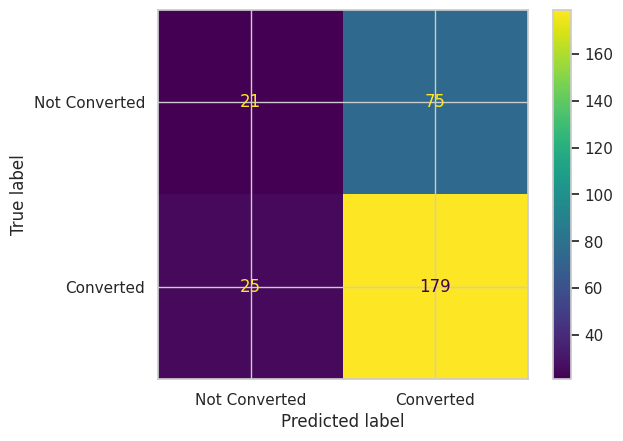

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Making predictions on the test set using the trained logistic regression model
y_pred = model.predict(X_test)

# Calculating key binary classification metrics for model evaluation
# Accuracy: Ratio of correctly predicted instances to the total instances
# Precision: Ratio of correctly predicted positive observations to the total predicted positives
# Recall (Sensitivity): Ratio of correctly predicted positive observations to the all observations in actual class
# F1 Score: Harmonic mean of Precision and Recall, gives a balance between them
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Creating and displaying a confusion matrix, a table used to evaluate the performance of a classification model
# The matrix compares the actual target values with those predicted by the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Converted', 'Converted'])
disp.plot()

# Compiling all the calculated metrics into a pandas DataFrame for easy visualization and interpretation
# This DataFrame acts as a summary of model performance
metrics_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Printing the DataFrame containing the metrics
print(metrics_summary)


### Model's Coefficients

Extracting Coefficients and Features: The coefficients of the trained logistic regression model are extracted along with the names of the corresponding features from the training dataset.

Creating a DataFrame: A DataFrame is created where each row consists of a feature name and its corresponding coefficient from the model.

Sorting the DataFrame: The DataFrame is then sorted based on the absolute value of the coefficients. This way, the most influential features (positively or negatively) appear at the top.

Displaying the DataFrame: Finally, the DataFrame, which now gives a clear view of the significance and influence of each feature on the model’s predictions, is printed. This is helpful for interpreting the model and understanding which features are the most influential in determining the output.

In [92]:
# Get the coefficients from the model
coefficients = model.coef_[0]

# Get the feature names
feature_names = X_train.columns

# Create a DataFrame for the coefficients
# This DataFrame consists of each feature and its corresponding coefficient from the model
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficients
# An additional column 'abs_coeff' is created to store the absolute values of the coefficients
# This column helps to sort the DataFrame, highlighting the most influential features regardless of the direction (positive/negative) of influence
coeff_df['abs_coeff'] = coeff_df['Coefficient'].apply(abs)
coeff_df = coeff_df.sort_values(by='abs_coeff', ascending=False).drop(columns=['abs_coeff'])

# Display the DataFrame
# The displayed DataFrame provides insight into the significance of each feature in influencing the logistic regression model’s predictions
print(coeff_df)



                                Feature  Coefficient
13                      Market_Positive     0.710833
11                      Market_Negative    -0.575034
5                   Previous_Experience     0.551823
3                        Received_Quote     0.346210
4   Percent_Operational_Field_Personnel    -0.232655
6                   Has_Similar_Service    -0.217293
2                 Expect_Course_Catalog    -0.204595
7                             Lead_Blog    -0.172700
12                       Market_Neutral    -0.135371
10                    Lead_Social Media     0.123695
0                 Lead_Engagement_Level     0.121758
9                       Lead_Google Ads     0.117681
17                    Customer_Negative    -0.096433
19                    Customer_Positive     0.080512
8                   Lead_Email Campaign    -0.068247
1                     Demo_Participants     0.039664
16                     Competitor_Equal    -0.031261
15                     Competitor_Below     0.

## Inference of Lead Conversion Probability with a Logistic Regression Model

Data Preparation: A dictionary containing synthetic data for a new lead is created and converted into a DataFrame.

One-Hot Encoding: The DataFrame is one-hot encoded to handle categorical variables, making it suitable for the prediction model.

Handling Missing Columns: Missing columns, if any, are added to the DataFrame and filled with zeros to match the structure of the training data.

Ordering Columns: The columns are ordered in the same way as in the training data to ensure consistency.

Prediction: The logistic regression model predicts the conversion probability for the new lead.

Output: The predicted conversion probability is displayed, providing insight into the likelihood of the new lead converting.



### Example 1: A Single Lead

In [64]:
import numpy as np
import pandas as pd

# Generating synthetic data for a new lead
new_lead_data = {
    'Lead_Source': 'Blog',
    'Lead_Engagement_Level': 3.5,
    'Market_Perception': 'Neutral',
    'Demo_Participants': 3,
    'Expect_Course_Catalog': True,
    'Received_Quote': True,
    'Percent_Operational_Field_Personnel': 0.6,
    'Previous_Experience': False,
    'Has_Similar_Service': True,
    'Customer_Feedback': 'Neutral',
    'Competitor_Positioning': 'Below'
}

# Convert the dictionary to a DataFrame
new_lead_df = pd.DataFrame([new_lead_data])

# Applying one-hot encoding similar to the training data
new_lead_one_hot = pd.get_dummies(new_lead_df)

# Ensuring the new lead has all the columns that the model expects
missing_cols = set(df_one_hot.columns) - set(new_lead_one_hot.columns)
for c in missing_cols:
    new_lead_one_hot[c] = 0

# Ordering the columns to match the training data
new_lead_one_hot = new_lead_one_hot[df_one_hot.columns]

# Predicting the conversion probability using the model
conversion_probability = model.predict_proba(new_lead_one_hot.drop(columns=['Converted']))[:, 1]

# Displaying the predicted conversion probability
print(f"The predicted probability of conversion for the new lead is: {conversion_probability[0]:.2f}")


The predicted probability of conversion for the new lead is: 0.62


### Example 2: Multiple Leads

In [93]:
import numpy as np
import pandas as pd

# Function to generate synthetic lead
def generate_lead():
    # Randomly assigning values to each feature of a lead
    return {
        'Lead_Source': np.random.choice(['Blog', 'Email Campaign', 'Google Ads', 'Social Media']),
        'Lead_Engagement_Level': np.random.uniform(1, 5),
        'Market_Perception': np.random.choice(['Positive', 'Neutral', 'Negative']),
        'Demo_Participants': np.random.randint(1, 6),
        'Expect_Course_Catalog': np.random.choice([True, False]),
        'Received_Quote': np.random.choice([True, False]),
        'Percent_Operational_Field_Personnel': np.random.uniform(0, 1),
        'Previous_Experience': np.random.choice([True, False]),
        'Has_Similar_Service': np.random.choice([True, False]),
        'Customer_Feedback': np.random.choice(['Positive', 'Neutral', 'Negative']),
        'Competitor_Positioning': np.random.choice(['Above', 'Equal', 'Below'])
    }

# Generating 10 new leads
new_leads = [generate_lead() for _ in range(10)]

# Converting to DataFrame
new_leads_df = pd.DataFrame(new_leads)

# Displaying the first 10 rows of the DataFrame
new_leads_df.head(10)


,Lead_Source,Lead_Engagement_Level,Market_Perception,Demo_Participants,Expect_Course_Catalog,Received_Quote,Percent_Operational_Field_Personnel,Previous_Experience,Has_Similar_Service,Customer_Feedback,Competitor_Positioning
0,Email Campaign,4.134336,Negative,4,True,True,0.533617,False,False,Neutral,Equal
1,Google Ads,2.957291,Positive,3,False,True,0.454951,False,True,Negative,Below
2,Google Ads,2.317285,Positive,3,False,False,0.544461,False,True,Negative,Equal
3,Blog,4.783099,Neutral,2,True,False,0.269634,False,False,Negative,Above
4,Email Campaign,2.920540,Neutral,5,True,True,0.579130,True,False,Negative,Equal
5,Email Campaign,3.533076,Negative,2,True,True,0.263026,False,True,Neutral,Above
6,Google Ads,3.733738,Negative,5,False,False,0.777945,True,True,Neutral,Equal
7,Email Campaign,2.301673,Positive,3,True,False,0.423808,False,True,Positive,Equal
8,Email Campaign,3.146313,Positive,3,False,True,0.128580,False,False,Negative,Above
9,Blog,1.262403,Negative,4,True,False,0.404520,True,True,Negative,Below


In [72]:
# Applying one-hot encoding
new_leads_one_hot = pd.get_dummies(new_leads_df)

# Ensuring the new leads have all the columns that the model expects
missing_cols = set(df_one_hot.columns) - set(new_leads_one_hot.columns)
for c in missing_cols:
    new_leads_one_hot[c] = 0

# Ordering the columns to match the training data
new_leads_one_hot = new_leads_one_hot[df_one_hot.columns]

# Predicting the conversion probabilities
conversion_probabilities = model.predict_proba(new_leads_one_hot.drop(columns=['Converted']))[:, 1]

# Adding the conversion probabilities as a new column
new_leads_one_hot['Conversion_Probability'] = conversion_probabilities

# Sorting the DataFrame based on the conversion probabilities
sorted_leads = new_leads_one_hot.sort_values(by='Conversion_Probability', ascending=False)

# Keeping only the Conversion_Probability column in the sorted leads DataFrame
sorted_leads = sorted_leads[['Conversion_Probability']]

# Displaying the sorted DataFrame
sorted_leads.head(10)


,Conversion_Probability
7,0.803662
3,0.797393
1,0.752592
0,0.702572
5,0.688939
8,0.656058
4,0.649119
2,0.647087
6,0.582844
9,0.488984


## Example 3: Synthetic Input File

This code will load the synthetic data, preprocess it, and then output the conversion probabilities as per the trained model's predictions. Remember to execute the code in an environment where the model and necessary libraries are available.

In [94]:
import numpy as np
import pandas as pd

# Function to generate synthetic lead
def generate_lead():
    return {
        'Lead_Source': np.random.choice(['Blog', 'Email Campaign', 'Google Ads', 'Social Media']),
        'Lead_Engagement_Level': np.random.uniform(1, 5),
        'Market_Perception': np.random.choice(['Positive', 'Neutral', 'Negative']),
        'Demo_Participants': np.random.randint(1, 6),
        'Expect_Course_Catalog': np.random.choice([True, False]),
        'Received_Quote': np.random.choice([True, False]),
        'Percent_Operational_Field_Personnel': np.random.uniform(0, 1),
        'Previous_Experience': np.random.choice([True, False]),
        'Has_Similar_Service': np.random.choice([True, False]),
        'Customer_Feedback': np.random.choice(['Positive', 'Neutral', 'Negative']),
        'Competitor_Positioning': np.random.choice(['Above', 'Equal', 'Below'])
    }

# Generating 100 new leads
new_leads = [generate_lead() for _ in range(100)]

# Converting to DataFrame
new_leads_df = pd.DataFrame(new_leads)

# Saving to CSV
new_leads_df.to_csv('synthetic_leads.csv', index=False)


## Apply the Model on the Input File

Loads the synthetic lead data from a CSV file and performs one-hot encoding.
It makes sure that the one-hot encoded data has the same columns as the training data used to train the model.
Uses the pre-trained model to calculate the conversion probabilities.
Adds the conversion probabilities as a new column to the DataFrame.
Sorts the DataFrame based on the conversion probabilities in descending order, so you can easily see which leads are most likely to convert.

In [100]:
import pandas as pd

# Assuming model is already trained and is named "model"
# Loading the synthetic leads data from CSV
leads_df = pd.read_csv('synthetic_leads.csv')

# One-hot encoding
leads_one_hot = pd.get_dummies(leads_df)

# Ensuring the data has all the columns that the model expects
missing_cols = set(X_train.columns) - set(leads_one_hot.columns)
for c in missing_cols:
    leads_one_hot[c] = 0

# Ordering the columns to match the training data
leads_one_hot = leads_one_hot[X_train.columns]

# Predicting the conversion probability
leads_conversion_prob = model.predict_proba(leads_one_hot)[:, 1]

# Adding the conversion probabilities as a new column in the original DataFrame
leads_df['Conversion_Probability'] = leads_conversion_prob

# Sorting the DataFrame based on the Conversion_Probability column in descending order
leads_df_sorted = leads_df.sort_values(by='Conversion_Probability', ascending=False)

# Keeping only the Conversion_Probability column in the sorted leads DataFrame
leads_df_sorted = leads_df_sorted[['Conversion_Probability']]

# Displaying the sorted DataFrame
leads_df_sorted.head(10)


,Conversion_Probability
67,0.814689
96,0.813089
93,0.812568
75,0.801303
80,0.798694
4,0.798130
20,0.796470
62,0.791479
64,0.790053
7,0.789133


## Using CursaLab Real Data:

Load the file into a datafrae.

Repeat the process using real data, starting from "Handle Categoric Variables" cell.

In [ ]:
import pandas as pd

# Path to the CSV file containing CursaLab's real data
file_path = 'cursalab_real_data.csv'

# Loading CursaLab's real leads data from CSV
cursalab_leads_df = pd.read_csv(file_path)